In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

type(data)

sklearn.utils._bunch.Bunch

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target # 0: 악성, Malignant: 진짜 암세포, 1: Benign, 양성, 비암성 종양

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
print(data.target_names)

# ['malignant' 'benign']

data.target.shape

# (569,)
# 각 샘플마다 정답 1개씩

['malignant' 'benign']


(569,)

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:

# sklearn
# train 과 split 을 분리 => default값이 없어서 내가 조종할 수 있음
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
# 이 순서대로 써야 함 y = data.target, X = data.data (카테고리)
# 67%는 트레이닝으로 33%는 테스트. 랜덤 추출.
N, D = X_train.shape

In [9]:
from sklearn.preprocessing import StandardScaler
# 정규화 sklearn에서 제공하는 전처리 방식

scaler = StandardScaler() # 객체 준비
X_train = scaler.fit_transform(X_train)
# 자동으로 모던 칼럼이 평균 0 표준편차 1로
X_test = scaler.transform(X_test)
# 테스트 데이터에서 이 값을 대입해서 이 값이 맞았는지 보는 거

In [10]:
# Sequential 선형 모델에 많이 들어가는 거 잊지 않았지..
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    # Input -> 입력값이 D개의 숫자 / 30가지의 컬럼에 해당되는 것 근데 하나로 본다
    #  => 1차원 배열 - (batch_size, D) keras의 문법 자동으로,, batch_size를 넣어서 2차원 배열로 만듦
    tf.keras.layers.Dense(1, activation='sigmoid') #
    # Dense -> 출력도 하나로 본다
    ]) # sigmold => 출력값이 0과 1사이의 확률 (e.g. 0.5 = 50%)

model.compile(optimizer='adam',
# 빠르고 안전하다고 입증이 된 안정적이고 최적의 적합도를 찾아주는 모델
              loss='binary_crossentropy',
              # 0과 1로 되어 있는 걸 구하는 손실 함수
              # 정답이 0 또는 1일 때, 예측값과 얼마나 차이 나는지를 계산하는 오차 함수
              metrics=['accuracy']) # 정확도를 추출해주는 부분 (정답률 확인)

r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)
# X_train = 훈련데이터, y_train = 훈련데이터의 정답, test.. 33%의 테이터데이터셋

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

# Train score: [0.0987597405910492, 0.9737532734870911]
# Test score: [0.11350634694099426, 0.978723406791687]
# [loss값, accuracy'값]

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.2233 - loss: 1.4292 - val_accuracy: 0.2500 - val_loss: 1.2271
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2707 - loss: 1.2608 - val_accuracy: 0.2713 - val_loss: 1.1149
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2897 - loss: 1.2102 - val_accuracy: 0.2872 - val_loss: 1.0109
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3481 - loss: 1.0389 - val_accuracy: 0.3457 - val_loss: 0.9168
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3655 - loss: 0.9405 - val_accuracy: 0.4202 - val_loss: 0.8319
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4224 - loss: 0.8448 - val_accuracy: 0.5000 - val_loss: 0.7563
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4809 - loss: 0.8063 - val_accuracy: 0.5851 - val_loss: 0.6892
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5357 - loss: 0.7256 - val_accuracy: 0.

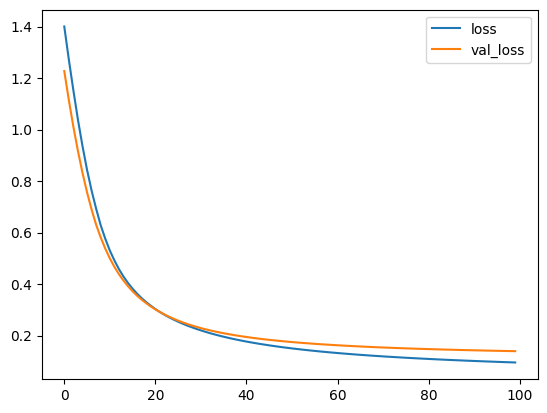

In [11]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

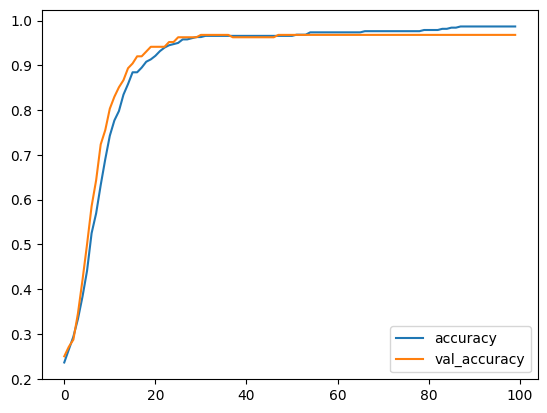

In [12]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [13]:
P = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [14]:
import pandas as pd

# 0,1로 나누기
P_class = (P >= 0.5).astype(int)

# 정리할 샘플 수
n_samples = 20

# 결과를 데이터프레임으로 정리
results = pd.DataFrame({
    'Predicted Probability': P[:n_samples].flatten(),
    'Predicted Class': P_class[:n_samples].flatten(),
    'Actual Class': y_test[:n_samples].flatten()

})


print(results)

    Predicted Probability  Predicted Class  Actual Class
0                0.952362                1             1
1                0.950941                1             1
2                0.991750                1             1
3                0.970659                1             1
4                0.722993                1             1
5                0.994936                1             1
6                0.983845                1             0
7                0.735919                1             1
8                0.299805                0             0
9                0.972909                1             1
10               0.759497                1             1
11               0.902640                1             1
12               0.985449                1             1
13               0.009344                0             0
14               0.331849                0             0
15               0.736385                1             1
16               0.997084      

In [15]:
import pandas as pd
import numpy as np

# squeeze : []가 두 개 일때, 안에서 알맹이를 빼겠다
P = model.predict(X_test).squeeze()
y_pred = (P >= 0.5).astype(int)

comparison_df = pd.DataFrame({
    'Predicted Probability': P,
    'Predicted Class' : y_pred,
    'Actual Class' : y_test
})

print(comparison_df.head(20))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
    Predicted Probability  Predicted Class  Actual Class
0                0.952362                1             1
1                0.950941                1             1
2                0.991750                1             1
3                0.970659                1             1
4                0.722993                1             1
5                0.994936                1             1
6                0.983845                1             0
7                0.735919                1             1
8                0.299805                0             0
9                0.972909                1             1
10               0.759497                1             1
11               0.902640                1             1
12               0.985449                1             1
13               0.009344                0             0
14               0.331849                0             0
15               0.736385                1        

In [16]:
test_sample = np.array([14.0, 20.0, 90.0, 600.0, 0.1, 0.2, 0.1, 0.05, 0.3, 0.06,
                     0.5, 1.0, 3.5, 40.0, 0.005, 0.02, 0.02, 0.01, 0.01, 0.004,
                     15.0, 25.0, 100.0, 700.0, 0.15, 0.35, 0.25, 0.12, 0.4, 0.08
                     ]).reshape(1, -1)

# reshpae 2차원 배열로 만들어주는 거 => 2차원이여야 알아들음 = 샘플 1개로 인식
# (1 : 샘플이 하나 있다는 뜻 (행 1개), -1 : 열의 개수는 자동으로 맞춰줌 (여기선 30개)

test_sample_scaled = scaler.transform(test_sample)

pred_prob = model.predict(test_sample_scaled)[0][0]
pred_class = int(pred_prob >= 0.5)

print(f"예측 확률 (양성일 확률): {pred_prob:.4f}")
print(f"예측 결과: {'양성 (Benign)' if pred_class == 1 else '악성 (Malignant)'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
예측 확률 (양성일 확률): 0.1236
예측 결과: 악성 (Malignant)
